# Informations of the Dataset

Import Essential Libraries

In [1]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import numpy as np

Load the data and Check the info of data

In [2]:
data=pd.read_csv('uci-secom.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [3]:
data.shape

(1567, 592)

In [4]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


The data consists of  1567 entries with 592 features, which it would mean

# Missing Values

It is mentioned that this dataset consists of null value, let's check how many columns consist of null value!

In [5]:
np.count_nonzero(data.isnull().sum())

538

There is 538 columns with consisting of null values, the quantity is quite high, let's check the highest null values contained in our columns.

In [6]:
no_na=data.isnull().sum()
pd.DataFrame(data=no_na,index=data.columns)

,0
Time,0
0,6
1,7
2,14
3,14
...,...
586,1
587,1
588,1
589,1


In [7]:
pd.set_option('display.max_rows',None)
no_na.sort_values(ascending=False)

158          1429
292          1429
293          1429
157          1429
85           1341
492          1341
220          1341
358          1341
517          1018
245          1018
246          1018
518          1018
382          1018
516          1018
109          1018
111          1018
244          1018
110          1018
384          1018
383          1018
579           949
581           949
580           949
578           949
346           794
345           794
73            794
72            794
519           715
385           715
112           715
247           715
568           273
566           273
565           273
569           273
563           273
562           273
567           273
564           273
555           260
553           260
554           260
557           260
556           260
549           260
546           260
548           260
547           260
550           260
551           260
552           260
90             51
89             51
363            51
362       

Wow!Seem like some of the columns are almost empty!We will take care of these features shortly. Let's set our evaluation model and metrics first.

Since some of the columns will be removed in every step, which leads to loss of information. so, it's important to check the perfomance of our model before removing them so that we can get a sense of whether we are going in the right direction or not.

I'm going to use a simple logistic regressor as my classifier.

Before implementing the classifier, it is important to make sure all of our features consist of only numerical data.
We could check this by referring to the datatype of each features.

# Modified / Remove Categorical Data

In [8]:
typedata={str(k): len(list(v)) for k, v in data.groupby(data.dtypes, axis=1)}
typedata

{'int64': 1, 'float64': 590, 'object': 1}

In [9]:
bygroup=data.columns.to_series().groupby(data.dtypes).groups
bygroup

{int64: ['Pass/Fail'], float64: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', ...], object: ['Time']}

In [10]:
data.select_dtypes(include=['object']).columns

Index(['Time'], dtype='object')

In [11]:
data['Time']

0       2008-07-19 11:55:00
1       2008-07-19 12:32:00
2       2008-07-19 13:17:00
3       2008-07-19 14:43:00
4       2008-07-19 15:22:00
5       2008-07-19 17:53:00
6       2008-07-19 19:44:00
7       2008-07-19 19:45:00
8       2008-07-19 20:24:00
9       2008-07-19 21:35:00
10      2008-07-19 21:57:00
11      2008-07-19 22:52:00
12      2008-07-20 03:35:00
13      2008-07-21 08:21:00
14      2008-07-21 11:53:00
15      2008-07-22 00:03:00
16      2008-07-22 02:59:00
17      2008-07-22 08:41:00
18      2008-07-22 11:47:00
19      2008-07-22 14:00:00
20      2008-07-22 15:30:00
21      2008-07-23 05:15:00
22      2008-07-23 19:22:00
23      2008-07-25 15:23:00
24      2008-07-27 04:18:00
25      2008-07-27 09:37:00
26      2008-07-27 11:10:00
27      2008-07-27 15:46:00
28      2008-07-27 16:06:00
29      2008-07-27 16:49:00
30      2008-07-27 20:24:00
31      2008-07-27 22:28:00
32      2008-07-27 22:28:00
33      2008-07-27 23:14:00
34      2008-07-28 03:31:00
35      2008-07-28 0

The time column is referring to the specific test point, which it may not influence much on the result. Semiconductor testing is strongly depending on the testing program itself.
Unless, there is some abnormality of testing program on that specific time range. This is abnormal and unusual to occur!  And so, we should ignore the timestamp.
Let's drop the column!

In [12]:
data.drop('Time',axis=1,inplace=True)

# Balance Datasets check

We need to determine the desired evaluation metrics for this datasets. If the datasets is highly imbalanced, accuracy will be a worst metrics.

In [13]:
data['Pass/Fail']

0      -1
1      -1
2       1
3      -1
4      -1
5      -1
6      -1
7      -1
8      -1
9      -1
10      1
11      1
12     -1
13     -1
14      1
15     -1
16     -1
17     -1
18     -1
19     -1
20     -1
21     -1
22     -1
23      1
24     -1
25     -1
26     -1
27     -1
28     -1
29     -1
30     -1
31     -1
32     -1
33     -1
34     -1
35     -1
36     -1
37     -1
38      1
39     -1
40      1
41     -1
42     -1
43     -1
44     -1
45      1
46     -1
47     -1
48      1
49      1
50      1
51     -1
52     -1
53     -1
54     -1
55     -1
56     -1
57      1
58      1
59     -1
60     -1
61     -1
62      1
63     -1
64      1
65     -1
66     -1
67     -1
68     -1
69     -1
70     -1
71     -1
72     -1
73     -1
74     -1
75     -1
76     -1
77     -1
78     -1
79     -1
80     -1
81     -1
82      1
83     -1
84     -1
85     -1
86     -1
87     -1
88     -1
89     -1
90     -1
91     -1
92     -1
93     -1
94     -1
95     -1
96      1
97     -1
98     -1
99     -1


from the datasets description: -1 corresponds to a pass and 1 corresponds to a fail. Since it is a bit confusing, I will replace the values with 1 corresponds to a pass and 0 corresponds to a fail.

In [14]:
data['Pass/Fail'].replace(to_replace=[-1,1],value=[1,0],inplace=True)


In [15]:
"{0:.3f}".format(np.count_nonzero(data['Pass/Fail'])/float(data.shape[0]))

'0.934'

Wow! 93.4% of data pass the testing, the datasets are clearly inbalanced. I will use these two metrics.

1.F1 Score: F1 is a suitable measure of models tested with imbalance datasets.


2.Matthews Correlation Coefficient (MCC): MCC is relatively insensitive to class size imbalance. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = data.drop('Pass/Fail', axis=1)
y = data[['Pass/Fail']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

As the target is significantly unbalanced, when spliting the datasets, the proportion of the values 0 and 1 in test_data and train_data might changed. To return it in same proportion of values with y dataset, we stratify y.

In [19]:
#convert to pandas dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
y_train = pd.DataFrame(y_train, columns=y.columns)
y_test = pd.DataFrame(y_test, columns=y.columns)

In [20]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

# logistics regression model
from sklearn.linear_model import LogisticRegression

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# metrics used for evaluation
from sklearn.metrics import f1_score,matthews_corrcoef

# visualizations
from yellowbrick.classifier import ClassPredictionError, ConfusionMatrix
from sklearn.metrics import plot_roc_curve

# KNN imputation
from sklearn.impute import KNNImputer

# Datetime
import datetime

# method used for handling imbalaced data
from imblearn.over_sampling import SMOTE

In [21]:
# before we proceed to remove some others features, let's take the performance of our model as baseline.
# however, missing values will affect the performance of training model
# impute missing values and save it as a temporary dataset

imputer = KNNImputer()
imputer.fit(X_train)
imputed_train = pd.DataFrame(imputer.transform(X_train),columns = X_train.columns)
imputed_test = pd.DataFrame(imputer.transform(X_test),columns = X_test.columns)



In [22]:
y_train.shape[0]

1175

In [23]:
# scale the data
scaler = StandardScaler()
train_std = pd.DataFrame(scaler.fit_transform(imputed_train),columns = imputed_train.columns)
test_std = pd.DataFrame(scaler.transform(imputed_test),columns = imputed_test.columns)

In [24]:
# oversampling
print("Before Oversampling, counts of label '1': {}".format(y_train['Pass/Fail'].sum()))
print("Before Oversampling, counts of label '0': {}\n".format(y_train.shape[0] - y_train['Pass/Fail'].sum()))

print("Before Oversampling, shape of X: {}".format(train_std.shape))
print("Before Oversampling, : {}\n".format(y_train.shape))
# oversample training data
oversample = SMOTE(random_state = 2)
over_X, over_y = oversample.fit_resample(train_std, y_train)

print("After Oversampling, counts of label '1': {}".format(over_y['Pass/Fail'].sum()))
print("After Oversampling, counts of label '0': {}\n".format(over_y.shape[0] - over_y['Pass/Fail'].sum()))

print("After Oversampling, shape of X: {}".format(over_X.shape))
print("After Oversampling, shape of y: {}\n".format(over_y.shape))

Before Oversampling, counts of label '1': 1097
Before Oversampling, counts of label '0': 78

Before Oversampling, shape of X: (1175, 590)
Before Oversampling, : (1175, 1)

After Oversampling, counts of label '1': 1097
After Oversampling, counts of label '0': 1097

After Oversampling, shape of X: (2194, 590)
After Oversampling, shape of y: (2194, 1)



In [25]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Yixin Phang\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


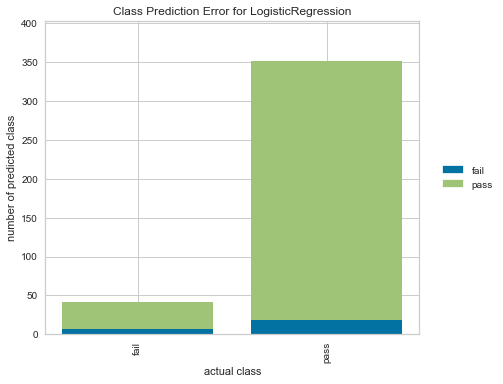

C:\Users\Yixin Phang\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


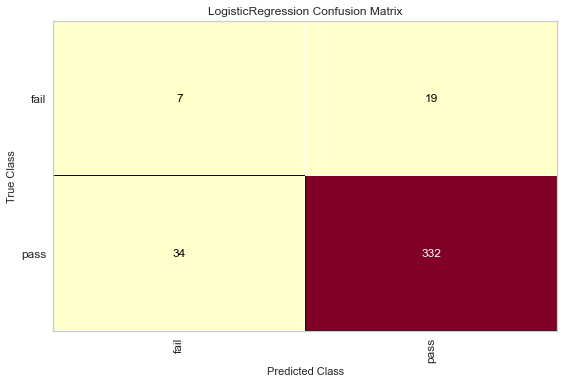

 Training time: 1338ms
 F1 Score: 0.8647959183673469 
 MCC Score: 0.14339012826038047


In [26]:
# Using logisticRegression model as the algorithm model
logit = LogisticRegression(random_state = 42, class_weight = 'balanced', solver = 'liblinear',max_iter = 1000)
start_time = datetime.datetime.now()
logit.fit(over_X, over_y.values.ravel())
elapsed = datetime.datetime.now() - start_time
time = int(elapsed.total_seconds()*1000)

y_predict = logit.predict(test_std)
y_true = y_test.values.ravel()
f1score = f1_score(y_true, y_predict, average = 'micro')
mccscore = matthews_corrcoef(y_true, y_predict)

y_predict.size
#visualizations
cpe = ClassPredictionError(logit,classes=['fail','pass'])
cpe.score(test_std, y_true)
cpe.show()

cm = ConfusionMatrix(logit,classes=['fail','pass'])
cm.score(test_std, y_true)
cm.show()

print (f' Training time: {time}ms\n F1 Score: {f1score} \n MCC Score: {mccscore}' )

f1scores = []
mccscores =[]
times =[]

f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

C:\Users\Yixin Phang\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


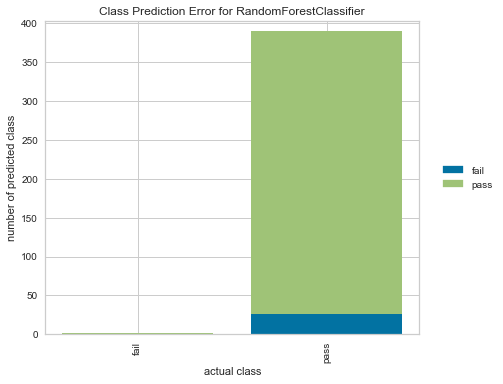

C:\Users\Yixin Phang\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


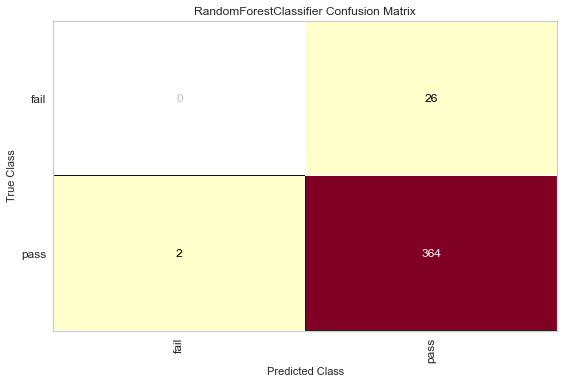

 Training time: 0ms
 F1 Score: 0.9285714285714286 
 MCC Score: -0.019086611143795607


In [27]:
# Using RandomForestClassifier as the algorithm model
forest = RandomForestClassifier(class_weight = 'balanced',random_state = 42)
forest.fit(over_X, over_y.values.ravel())
start_time = datetime.datetime.now()
elapsed = datetime.datetime.now() - start_time
time = int(elapsed.total_seconds()*1000)

y_predict = forest.predict(test_std)
y_true = y_test.values.ravel()
f1score = f1_score(y_true, y_predict, average = 'micro')
mccscore = matthews_corrcoef(y_true, y_predict)


#visualizations
cpe = ClassPredictionError(forest,classes=['fail','pass'])
cpe.score(test_std, y_true)
cpe.show()

cm = ConfusionMatrix(forest,classes=['fail','pass'])
cm.score(test_std, y_true)
cm.show()

print (f' Training time: {time}ms\n F1 Score: {f1score} \n MCC Score: {mccscore}' )

f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

if only taking count on F1 score, Ramdom Forest Classifier seems outperformed than Logistics Regression in this datasets.
However, this arise as F1 score ignores the count of True Negative and strongly influenced by True Positive Values.
In this case, only 2 is predicted to class'Fail' which almost all the values are predicted to be in class 'Pass'. This could be convinced from the MCC Score which is very near to 0.
Hence, we will choose LogisticRegression model for this dataset and proceed to reduce the numbers of features.

In [28]:
f1scores.pop()
mccscores.pop()
times.pop()

f1scores
mccscores
times

[1338]

In [29]:
def evaluate(train_df, test_df, train_target, test_target):
        
        # data scaling for better perfomance of logistic regression
        scaler = StandardScaler()
        scaler.fit(train_df)
        train_std = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
        test_std = pd.DataFrame(scaler.transform(test_df), columns = test_df.columns)
        
        # oversampling 
        oversample = SMOTE(random_state = 2)
        over_X, over_y = oversample.fit_resample(train_std, train_target)
        
        # training the model
        logit = LogisticRegression(random_state = 42, class_weight='balanced', solver='liblinear',max_iter = 1000)
        start_time = datetime.datetime.now()
        logit.fit(over_X,over_y.values.ravel())
        elapsed = datetime.datetime.now() - start_time
        time = int(elapsed.total_seconds()*1000)
        
        y_predict = logit.predict(test_std)
        y_true = test_target.values.ravel()
        f1score = f1_score(y_true, y_predict, average = 'micro')
        mccscore = matthews_corrcoef(y_true, y_predict)

        #visualizations
        cpe = ClassPredictionError(logit, classes=['fail','pass'])
        cpe.score(test_std, y_true)
        cpe.show()

        cm = ConfusionMatrix(logit,classes=['fail','pass'])
        cm.score(test_std, y_true)
        cm.show()

        return time, f1score, mccscore

# 1. Percent Missing Values

In [30]:
def percentna(dataframe, threshold):
    columns = dataframe.columns[(dataframe.isna().sum()/dataframe.shape[1])>threshold] ## return columns which is True
    return columns.tolist()

In [31]:
na_columns = percentna(X_train, 0.5)
print ('There are {} columns which are having more than 50% missing values'.format(len(na_columns)))

There are 32 columns which are having more than 50% missing values


In [32]:
X_train_nona = X_train.drop(na_columns,axis = 1)
X_test_nona = X_test.drop(na_columns,axis = 1)
n_features1 = X_train_nona.shape[1]
print(f' There are {n_features1} features left.')

 There are 558 features left.


# 2. Impute Missing Values

Okay,let's impute remaining data for those columns with missing values.

In [45]:
imputer = KNNImputer()
X_train_imp = pd.DataFrame(imputer.fit_transform(X_train_nona),columns = X_train_nona.columns)
X_test_imp = pd.DataFrame(imputer.transform(X_test_nona),columns = X_test_nona.columns)

X_train_imp

,0,1,2,3,4,5,6,7,8,9,...,576,577,582,583,584,585,586,587,588,589
0,3025.070,2391.870,2182.62220,1209.50920,0.89750,100.0,104.66890,0.12260,1.36440,0.02370,...,1.6892,14.6674,0.5046,0.0107,0.00280,2.11100,0.10280,0.02330,0.00640,22.62310
1,2983.640,2542.560,2182.41110,3355.20070,1.45290,100.0,82.13110,0.12480,1.52030,0.04240,...,88.1774,72.1057,0.5033,0.0160,0.00380,3.17980,0.01710,0.01940,0.00690,113.55060
2,3006.800,2536.870,2200.59778,1242.74276,1.17950,100.0,102.90134,0.00000,1.48140,0.01800,...,1.5218,17.2472,0.4974,0.0111,0.00340,2.23440,-0.00310,0.01680,0.00610,545.68380
3,2959.290,2478.620,2197.23330,1435.14600,0.97400,100.0,104.87330,0.12260,1.51260,-0.01920,...,1.9901,18.1111,0.5024,0.0162,0.00480,3.22820,0.03580,0.01620,0.00590,45.25820
4,3071.050,2642.150,2200.98890,1054.52400,1.38300,100.0,100.18000,0.12010,1.45320,0.00490,...,2.0496,11.8225,0.4973,0.0139,0.00390,2.78510,0.01220,0.01310,0.00390,107.52570
5,3101.280,2464.330,2216.51110,871.25260,1.23660,100.0,107.48670,0.11940,1.40630,-0.01010,...,1.3108,8.5456,0.4997,0.0109,0.00290,2.18530,0.00720,0.02100,0.00650,291.80400
6,3056.500,2481.090,2220.44440,1637.29460,1.36800,100.0,100.51890,0.12310,1.44020,-0.01800,...,1.7921,12.1324,0.5009,0.0153,0.00350,3.05450,0.03380,0.01190,0.00370,35.21480
7,2977.980,2384.660,2212.71110,1062.62880,1.38480,100.0,101.93000,0.12120,1.43100,0.00900,...,1.4891,10.3231,0.5073,0.0157,0.00400,3.09350,0.01230,0.00940,0.00260,76.45840
8,2943.340,2485.000,2234.61110,1590.16990,1.20490,100.0,98.75670,0.12080,1.60810,0.01430,...,1.6755,10.4655,0.4989,0.0109,0.00320,2.19370,0.00770,0.02040,0.00810,264.75250
9,3053.480,2524.950,2215.81110,1389.30650,2.31830,100.0,98.45000,0.12140,1.57180,0.02110,...,1.6951,12.6333,0.5007,0.0213,0.00460,4.24670,0.01570,0.01900,0.00590,120.63650


C:\Users\Yixin Phang\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


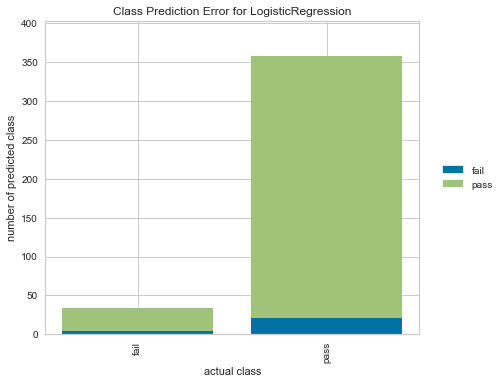

C:\Users\Yixin Phang\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


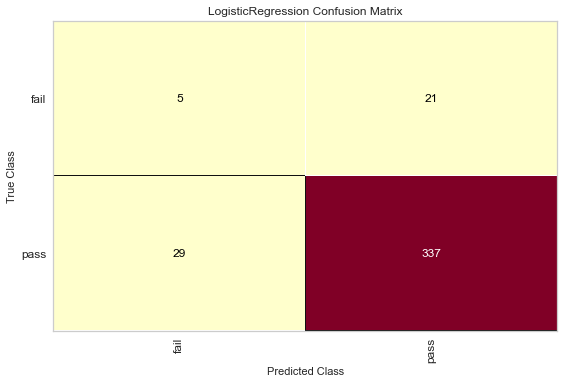

 Training time: 1016ms
 F1 Score: 0.8724489795918368 
 MCC Score: 0.09997791668831435


In [34]:
time,f1score,mccscore = evaluate(train_df = X_train_imp, test_df = X_test_imp, train_target = y_train, test_target = y_test)
print (f' Training time: {time}ms\n F1 Score: {f1score} \n MCC Score: {mccscore}' )

f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

Let's run our evaluation function now:

# 3. Variation below threshold

Next, we could proceed to eliminate features having variation below a specified threshold. A characteristic has low predictive potential if it doesn't vary much within itself.

Here, we will normalize our data using scikit learn's Normalizer instead of StandardScaler.
The difference is that Normalizer does not remove mean and scale by deviation but scales the whole row to unit norm.

In [36]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train_imp)

Normalizer()

In [37]:
X_train_nrm = pd.DataFrame(normalizer.transform(X_train_imp), columns = X_train_imp.columns)
X_test_nrm = pd.DataFrame(normalizer.transform(X_test_imp), columns = X_test_imp.columns)

A column with very low variance have almost constant values in every row. By using the estimator with a low threshold like 0, we can filter our those corrsponding column which is useless.

In [40]:
# Set VarianceThreshold and Filter
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit(X_train_nrm)

# check which columns will be keep
mask = selector.get_support() 
selected_cols = X_train_nrm.columns[mask]

# transform the datasets
X_train_var = pd.DataFrame(selector.transform(X_train_imp), columns = selected_cols)
X_test_var = pd.DataFrame(selector.transform(X_test_imp),columns = selected_cols)

#check amount of features keep.
print(f' Remaining Features: {X_train_var.shape[1]}')

 Remaining Features: 446


C:\Users\Yixin Phang\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


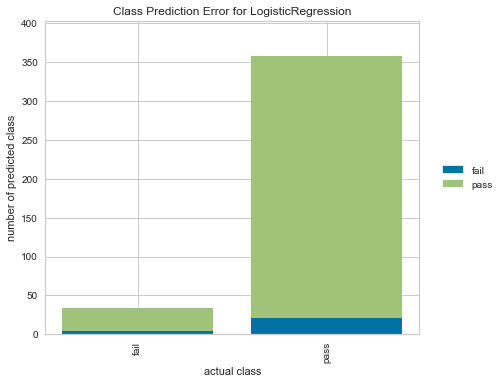

C:\Users\Yixin Phang\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


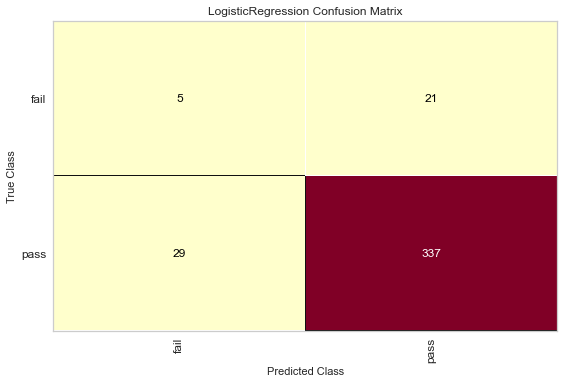

 Training time: 1090ms
 F1 Score: 0.8724489795918368 
 MCC Score: 0.09997791668831435


In [41]:
# Evaluation of model
time,f1score,mccscore = evaluate(train_df = X_train_var, test_df = X_test_var, train_target = y_train, test_target = y_test)
print (f' Training time: {time}ms\n F1 Score: {f1score} \n MCC Score: {mccscore}' )

f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)


# 4. Pairwise Correlation

The correlation coefficient reflects how similar the measurements of two or more variables(features) are accross a dataset.
The coefficient is a number between -1 and 1.

Generally, if its value is:

    1 : Perfect positive correlation, the variables change in same direction along when one variable changes.
    
    -1 : Perfect negative correlation, the variables change in oppositie direction with the direction of one variables change
   
    0 : When the value is nearer to 0 or exactly 0, there is no relationship between the variables

If two independent features have high absolute correlation, the information they provide for our ML model is quite similar. One of the variables is reductant so we can drop one of them 

In [ ]:
To find the columns we have to drop, I use the following function which is written by Krish C Naik.

In [60]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [61]:
corr_features = correlation(X_train_var, 0.95)
X_train_corr = X_train_var.drop(corr_features, axis = 1)
X_test_corr = X_test_var.drop(corr_features, axis = 1)



After removing 177, there is 1175 remaining features.


In [63]:
print(f'After removing {len(corr_features)}, there is {X_train_corr.shape[1]} remaining features.')

After removing 177, there is 269 remaining features.


Time to evaluate the model!

C:\Users\Yixin Phang\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


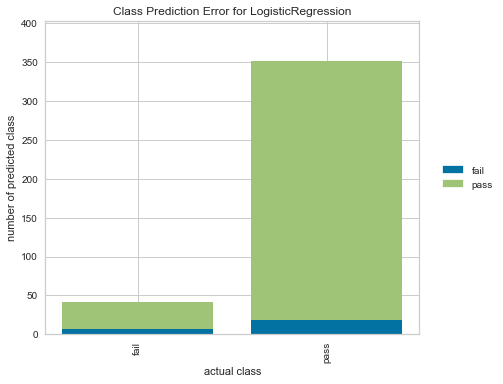

C:\Users\Yixin Phang\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


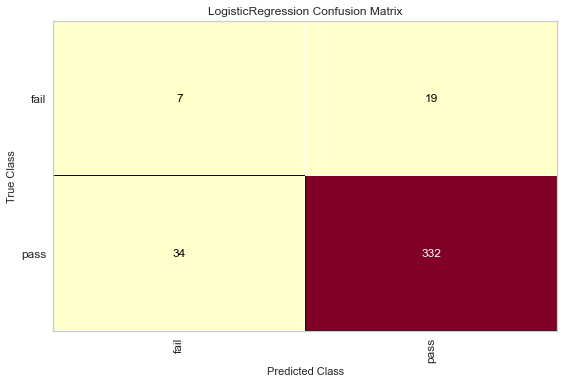

 Training time: 400ms
 F1 Score: 0.8647959183673469 
 MCC Score: 0.14339012826038047


In [68]:
# Evaluation of model
time,f1score,mccscore = evaluate(train_df = X_train_corr, test_df = X_test_corr, train_target = y_train, test_target = y_test)
print (f' Training time: {time}ms\n F1 Score: {f1score} \n MCC Score: {mccscore}' )

f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)


# 5. Correlation with Target

In [ ]:
Unlike the pairwise correlation between features in which lower correlation is desirable, high correlation between features and target supply higher predictive power than low correlation.
Hence, we should remove those features with low correlation with target.

In [70]:
temporary_train = X_train_corr.copy()
temporary_train['target'] = y_train

In [111]:
# let's check the correlation of features with target
temporary_train.corr()

,0,1,2,3,4,5,6,7,8,9,...,570,571,572,573,582,583,586,587,589,target
0,1.000000,-0.098809,0.004430,0.035554,-0.015899,NaN,-0.022987,0.030430,-0.033017,0.017252,...,-0.017251,-0.001025,0.005277,0.012792,-0.001902,0.030948,0.014697,-0.011665,0.011353,-0.041909
1,-0.098809,1.000000,0.005975,-0.007511,-0.003538,NaN,-0.038668,0.009336,0.024434,0.005935,...,-0.016710,-0.050368,0.005975,-0.001193,0.012852,-0.005232,-0.012071,0.004038,0.039951,0.025261
2,0.004430,0.005975,1.000000,0.322994,0.067523,NaN,-0.143612,-0.156079,0.006392,0.015468,...,-0.026620,-0.016454,0.002239,-0.033954,-0.025031,0.022799,-0.047219,-0.039777,-0.032285,0.067531
3,0.035554,-0.007511,0.322994,1.000000,-0.024861,NaN,-0.684440,0.076149,-0.089244,0.074054,...,0.004502,-0.013038,-0.016850,-0.021561,0.002292,0.033869,0.040366,-0.030495,-0.078857,0.039372
4,-0.015899,-0.003538,0.067523,-0.024861,1.000000,NaN,-0.064604,-0.635590,-0.031815,0.059001,...,0.006764,-0.088126,-0.011573,-0.016474,0.037384,0.001926,-0.025698,-0.041966,-0.011705,0.016083
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.022987,-0.038668,-0.143612,-0.684440,-0.064604,NaN,1.000000,0.034344,0.058447,-0.047643,...,0.017889,0.030940,0.028601,0.019429,-0.018166,-0.047332,-0.059182,0.011845,0.045907,-0.034333
7,0.030430,0.009336,-0.156079,0.076149,-0.635590,NaN,0.034344,1.000000,0.009540,-0.078959,...,0.008775,0.101656,0.013844,0.022639,-0.023740,0.004595,0.068213,-0.015442,-0.108618,0.060858
8,-0.033017,0.024434,0.006392,-0.089244,-0.031815,NaN,0.058447,0.009540,1.000000,-0.139377,...,0.021113,0.073644,0.045308,0.027299,-0.038088,0.024208,-0.009636,0.004089,-0.021602,0.021039
9,0.017252,0.005935,0.015468,0.074054,0.059001,NaN,-0.047643,-0.078959,-0.139377,1.000000,...,-0.049365,0.031480,0.064579,0.067584,0.047444,-0.042983,0.024630,0.081734,0.010610,0.041542


Notice that some of the data is not available, and it may possibly caused by the variance of the features is 0.
Let's check the data under those columns

In [127]:
null = pd.DataFrame(temporary_train.corr())
null_columns = null[null['target'].isna()]
null_columns = null_columns.index.tolist()

In [121]:
# Define a function for target correlation
def corrwith_target(dataframe, target, threshold):
    cor = dataframe.corr()
    # Correlation with output variable
    cor_target = abs(cor[target])
    # Selecting non correlated features
    irrelevant_features = cor_target[cor_target < threshold]
    return irrelevant_features.index.tolist()[:-1] # return all irrelevant features but excluded the target itself

In [129]:
wcorrwith_cols = corrwith_target(temporary_train, 'target', 0.05)
for i in range(len(null_columns)):
    wcorrwith_cols.append(null_columns[i])


In [131]:
X_train_corw = X_train_corr.drop(wcorrwith_cols, axis = 1)
X_test_corw = X_test_corr.drop(wcorrwith_cols, axis = 1)
print(f' After removing {len(wcorrwith_cols)} features, there are {X_train_corw.shape[1]} features left.')

 After removing 239 features, there are 30 features left.


C:\Users\Yixin Phang\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


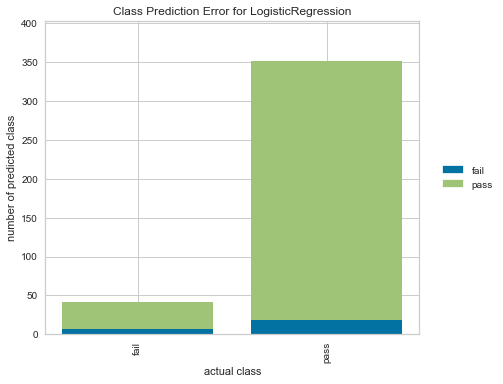

C:\Users\Yixin Phang\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


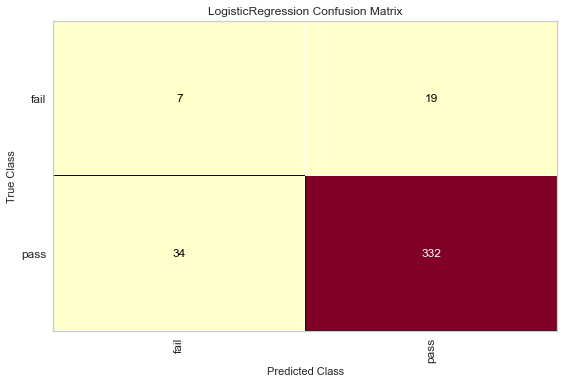

 Training time: 410ms
 F1 Score: 0.8647959183673469 
 MCC Score: 0.14339012826038047


In [132]:
# Evaluation of model
time,f1score,mccscore = evaluate(train_df = X_train_corr, test_df = X_test_corr, train_target = y_train, test_target = y_test)
print (f' Training time: {time}ms\n F1 Score: {f1score} \n MCC Score: {mccscore}' )

f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

# 6. Recursive Feature Elimination

This is the last step. We are going to use Recursive feature elimination with cross-validation to find the optimum number of features from the remaining 30 features.

In general, RFE works by searching for a subset of features based on their importance and eliminate the features which are considered less significant by starting with all features in training datasets.

It will stop when a certain number of features are left, or elimination of features no longer help the model.

In [134]:
scaler = StandardScaler()
scaler.fit(X_train_corw)

StandardScaler()

In [135]:
X_train_std = pd.DataFrame(scaler.transform(X_train_corw), columns = X_train_corw.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test_corw), columns = X_test_corw.columns)

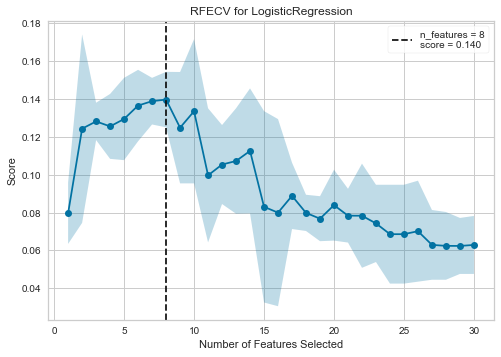

<AxesSubplot:title={'center':'RFECV for LogisticRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [139]:
from sklearn.metrics import make_scorer
from yellowbrick.model_selection import RFECV
from sklearn.model_selection import StratifiedKFold

mcc_scorer = make_scorer(matthews_corrcoef)
rfecv = RFECV(estimator=LogisticRegression(random_state = 42, class_weight='balanced', dual=False, solver='liblinear'),
              cv=StratifiedKFold(2),
              scoring =  mcc_scorer)
rfecv.fit(X_train_std, y_train.values.ravel())
rfecv.show() 

In [140]:
mask = rfecv.get_support()
columns = X_train_corw.columns
selected_cols = columns[mask]

X_train_rfe = pd.DataFrame(rfecv.transform(X_train_corw), columns = selected_cols)
X_test_rfe = pd.DataFrame(rfecv.transform(X_test_corw), columns = selected_cols)

Now let's check our evaluation model again:

C:\Users\Yixin Phang\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


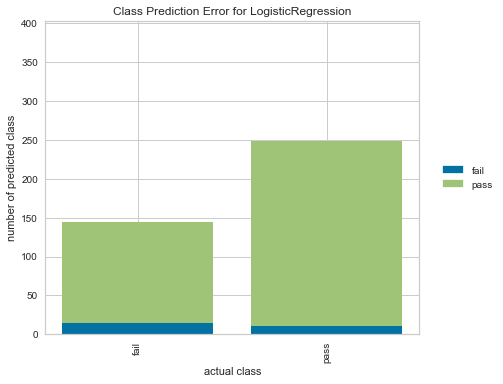

C:\Users\Yixin Phang\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


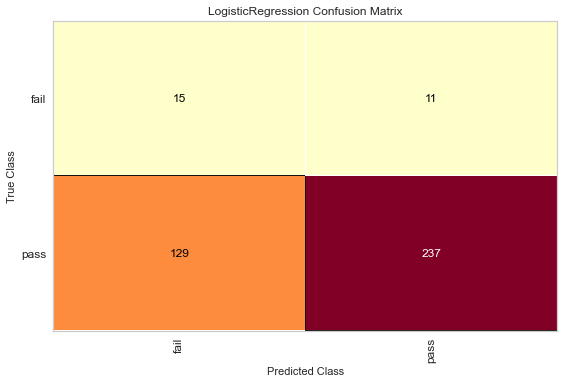

 Training time: 4ms
 F1 Score: 0.6428571428571429
 MCC Score: 0.11586891632757125


In [141]:
time, f1score, mccscore = evaluate(train_df = X_train_rfe, test_df = X_test_rfe, train_target=y_train, test_target=y_test)

print(f' Training time: {time}ms\n F1 Score: {f1score}\n MCC Score: {mccscore}')

f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

# Overall Figure for Scores and Training Time 

Alright, it's time to view the performance of our model during each feature elimination
We will plot a plot showing our model's scores compared with training time.

<ipython-input-146-9710962b30c9>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


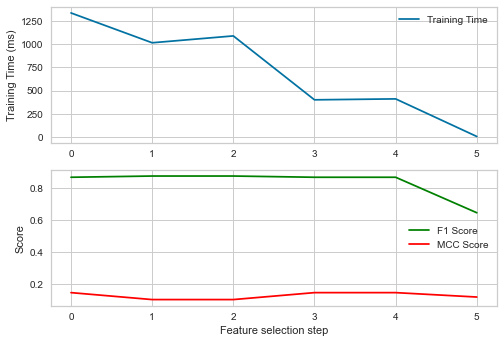

In [146]:
fig, (ax0, ax1) = plt.subplots(2,1)
ax0.plot(times, label = 'Training Time')
ax0.set(ylabel = 'Training Time (ms)')
ax1.plot(f1scores, label = 'F1 Score', c = 'green')
ax1.plot(mccscores, label = 'MCC Score', c = 'red')
ax1.set(ylabel = 'Score')
ax1.set(xlabel = 'Feature selection step')
ax1.legend()
ax0.legend()
fig.show()

as figure shown, the scores are quite stable before last step RFE is taken. However, notice that there is a drastic drop of our training time which take only 4ms at last step!

In scenarios where we have a lot of data, like in real world companies, a huge boost in speed with a little accuracy is acceptable.

# Conclusion

In [ ]:
We successfully selected a handful of features from about 600!
Although the F1 score only fall around  0.64, but based on confusion matrix, the false positive amount is reduced while boostig our training speed
This is important as this will reduce the risk to ship a defect product but pass the testing result to the customer.